#Import potrebnih biblioteka i učitavanje podataka


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,...,5,4.0,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,...,1,1.0,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,...,5,4.0,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,...,2,2.0,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,...,3,3.0,4,4,3,3,3,0,0.0,satisfied


In [ ]:
train_data.tail()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192.0,2.0,...,2,3.0,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347.0,4.0,...,5,5.0,5,5,5,5,4,0,0.0,satisfied
103901,103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995.0,1.0,...,4,3.0,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000.0,1.0,...,1,4.0,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723.0,1.0,...,1,1.0,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [ ]:
train_data.shape

(103904, 26)

In [ ]:
test_data.shape

(20000, 26)

Pomoću funkcija head i tail vidimo da se radi o datasetu koji predstavlja anketirane putnike jedne avionske službe. Train dataset se sastoji od 103904 redova i 26 kolona, te test dataset od 20000 redova i 26 kolona.

In [ ]:
train_data['id'].unique().size

103904

In [ ]:
test_data['id'].unique().size

20000

Funkcija unique nam vraca koliko ima unikatnih redova u koloni, vidimo da ih ima koliko i ima ukupno redova pa nemamo redova koji se ponavljaju.

#Analiza i priprema podataka za učenje modela

In [ ]:
train_data = train_data.drop(train_data[['Unnamed: 0.1']], axis=1)
train_data = train_data.drop(train_data[['Unnamed: 0']], axis=1)
train_data = train_data.drop(train_data[['id']], axis=1)
test_data = test_data.drop(test_data[['Unnamed: 0.1']], axis=1)
test_data = test_data.drop(test_data[['Unnamed: 0']], axis=1)
test_data = test_data.drop(test_data[['id']], axis=1)

Uočimo da kolone "Unnamed: 0.1", "Unnamed: 0" i "id" su bespotrebne za naše učenje pa ih uklanjamo.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103861 non-null  object 
 1   Customer Type                      103875 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103784 non-null  object 
 4   Class                              103684 non-null  object 
 5   Flight Distance                    103705 non-null  float64
 6   Inflight wifi service              103654 non-null  float64
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

##Null vrijednosti

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             20000 non-null  object 
 1   Customer Type                      20000 non-null  object 
 2   Age                                20000 non-null  int64  
 3   Type of Travel                     20000 non-null  object 
 4   Class                              20000 non-null  object 
 5   Flight Distance                    20000 non-null  int64  
 6   Inflight wifi service              20000 non-null  int64  
 7   Departure/Arrival time convenient  20000 non-null  int64  
 8   Ease of Online booking             20000 non-null  int64  
 9   Gate location                      20000 non-null  int64  
 10  Food and drink                     20000 non-null  int64  
 11  Online boarding                    20000 non-null  int

Možemo primjetiti da u train datasetu imamo nekoliko kolona sa null vrijednostima, a u test datasetu to je samo kolona 'Arrival Delay in Minutes'. Redove čije su kolone kategorične ću ukloniti jer ih je premal broj u odnosu na dataset (0.004%), dok ću brojčane kolone ostaviti, te u njih upisati srednju vrijednost kolone.


In [ ]:
train_data = train_data.dropna(subset=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [ ]:
FD_mean=train_data['Flight Distance'].mean()
Iws_mean=train_data['Inflight wifi service'].mean()
ADiM_mean=train_data['Arrival Delay in Minutes'].mean()
ADiMtest_mean=test_data['Arrival Delay in Minutes'].mean()

train_data['Flight Distance'].fillna(f'{FD_mean:.1f}',inplace=True)
train_data['Inflight wifi service'].fillna(f'{Iws_mean:.1f}',inplace=True)
train_data['Arrival Delay in Minutes'].fillna(f'{ADiM_mean:.1f}',inplace=True)
test_data['Arrival Delay in Minutes'].fillna(f'{ADiMtest_mean:.1f}',inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103524 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103524 non-null  object 
 1   Customer Type                      103524 non-null  object 
 2   Age                                103524 non-null  int64  
 3   Type of Travel                     103524 non-null  object 
 4   Class                              103524 non-null  object 
 5   Flight Distance                    103524 non-null  object 
 6   Inflight wifi service              103524 non-null  object 
 7   Departure/Arrival time convenient  103524 non-null  int64  
 8   Ease of Online booking             103524 non-null  int64  
 9   Gate location                      103524 non-null  int64  
 10  Food and drink                     103524 non-null  int64  
 11  Online boarding                    1035

Sada su sve kolone bez null vrijednosti.

##Razni grafici

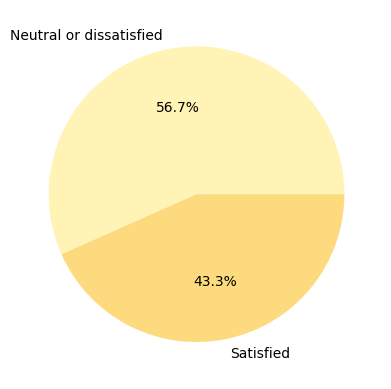

In [ ]:
plt.pie(train_data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Sa grafika iznad, možemo vidjeti da je broj zadovoljnih putnika malo manji od nezadovoljnih, međutim uzimajući u obzir da u nezadovoljne spadaju i neutralni možemo smatrati da je balansirano.

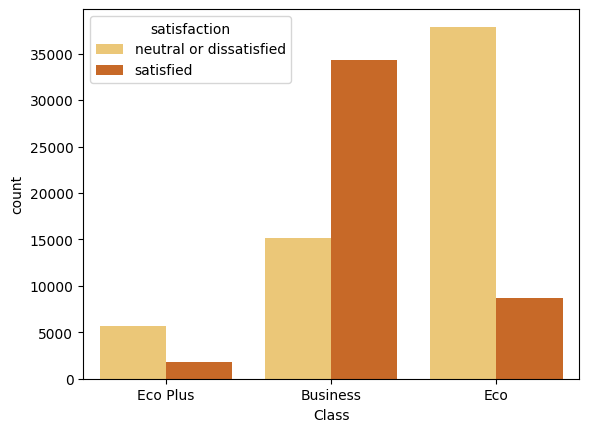

In [ ]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = train_data)
plt.show()

Sa prethodnog grafa vidimo da ukoliko se vozimo Business Classom vjerovatno ćemo biti zadovoljni, dok ako se vozimo Eco Classom biti će suprotno.

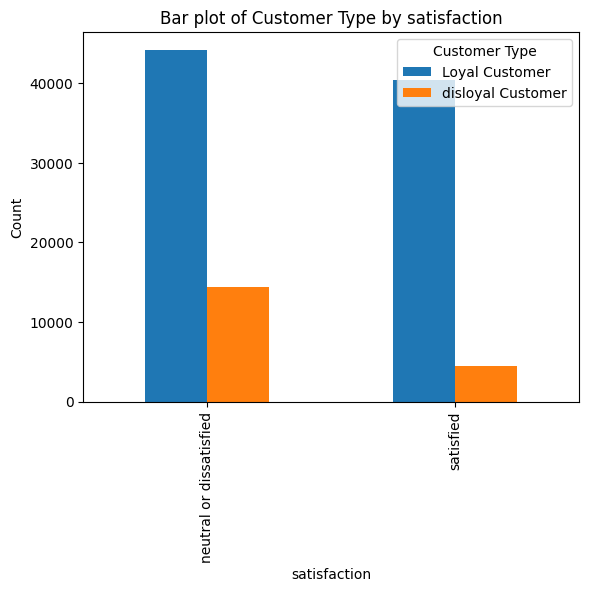

In [ ]:
fig, ax = plt.subplots()
counts = train_data.groupby(['satisfaction', 'Customer Type']).size().unstack()
counts.plot(kind='bar', ax=ax)
ax.set_xlabel('satisfaction')
ax.set_ylabel('Count')
ax.set_title(f'Bar plot of Customer Type by satisfaction')
plt.show()

Vidimo da ako smo Disloyal Customer vjerovatno nećemo biti zadovoljni, dok s druge strane imamo podjednako zadovoljnih i nezadovoljnih.

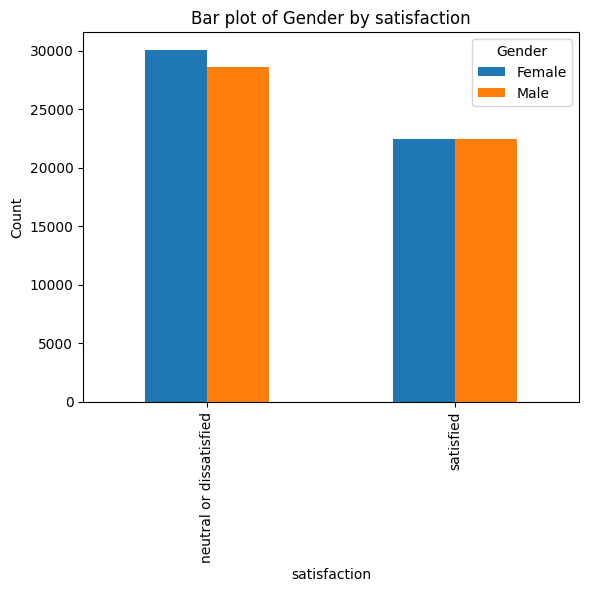

In [ ]:
fig, ax = plt.subplots()
counts = train_data.groupby(['satisfaction', 'Gender']).size().unstack()
counts.plot(kind='bar', ax=ax)
ax.set_xlabel('satisfaction')
ax.set_ylabel('Count')
ax.set_title(f'Bar plot of Gender by satisfaction')
plt.show()

Sa prethodnog grafika možemo vidjeti sa spol putnika uopšte ne utiče na to da li će biti zadovoljan ili ne.

##Label Encoder

In [ ]:
categories=['Gender','Customer Type','Type of Travel','Class','satisfaction']

L_encoder=LabelEncoder()

for category in categories:
    train_data[category]=L_encoder.fit_transform(train_data[category])
    test_data[category]=L_encoder.fit_transform(test_data[category])

Pošto modeli rade samo sa brojčanim vrijednostima, potrebno je da sve kolone budu brojčane. To se postiglo pomoću Label Encodera iz sklearna. Ispod se nalazi novi izgled našeg dataseta.

In [ ]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460.0,3.0,4,3,1,...,5,4.0,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235.0,3.0,2,3,3,...,1,1.0,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142.0,2.0,2,2,2,...,5,4.0,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562.0,2.0,5,5,5,...,2,2.0,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214.0,3.0,3,3,3,...,3,3.0,4,4,3,3,3,0,0.0,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103524 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103524 non-null  int64  
 1   Customer Type                      103524 non-null  int64  
 2   Age                                103524 non-null  int64  
 3   Type of Travel                     103524 non-null  int64  
 4   Class                              103524 non-null  int64  
 5   Flight Distance                    103524 non-null  object 
 6   Inflight wifi service              103524 non-null  object 
 7   Departure/Arrival time convenient  103524 non-null  int64  
 8   Ease of Online booking             103524 non-null  int64  
 9   Gate location                      103524 non-null  int64  
 10  Food and drink                     103524 non-null  int64  
 11  Online boarding                    1035

In [ ]:
objects = ['Flight Distance', 'Inflight wifi service', 'On-board service']

for object in objects:
    train_data[object]=train_data[object].astype(float)
    test_data[object]=test_data[object].astype(float)

Također, kolone tipa 'object' pretvaramo u 'float'.

##Korelacija podataka

<ipython-input-85-56f6b12a0059>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train_data.corr()


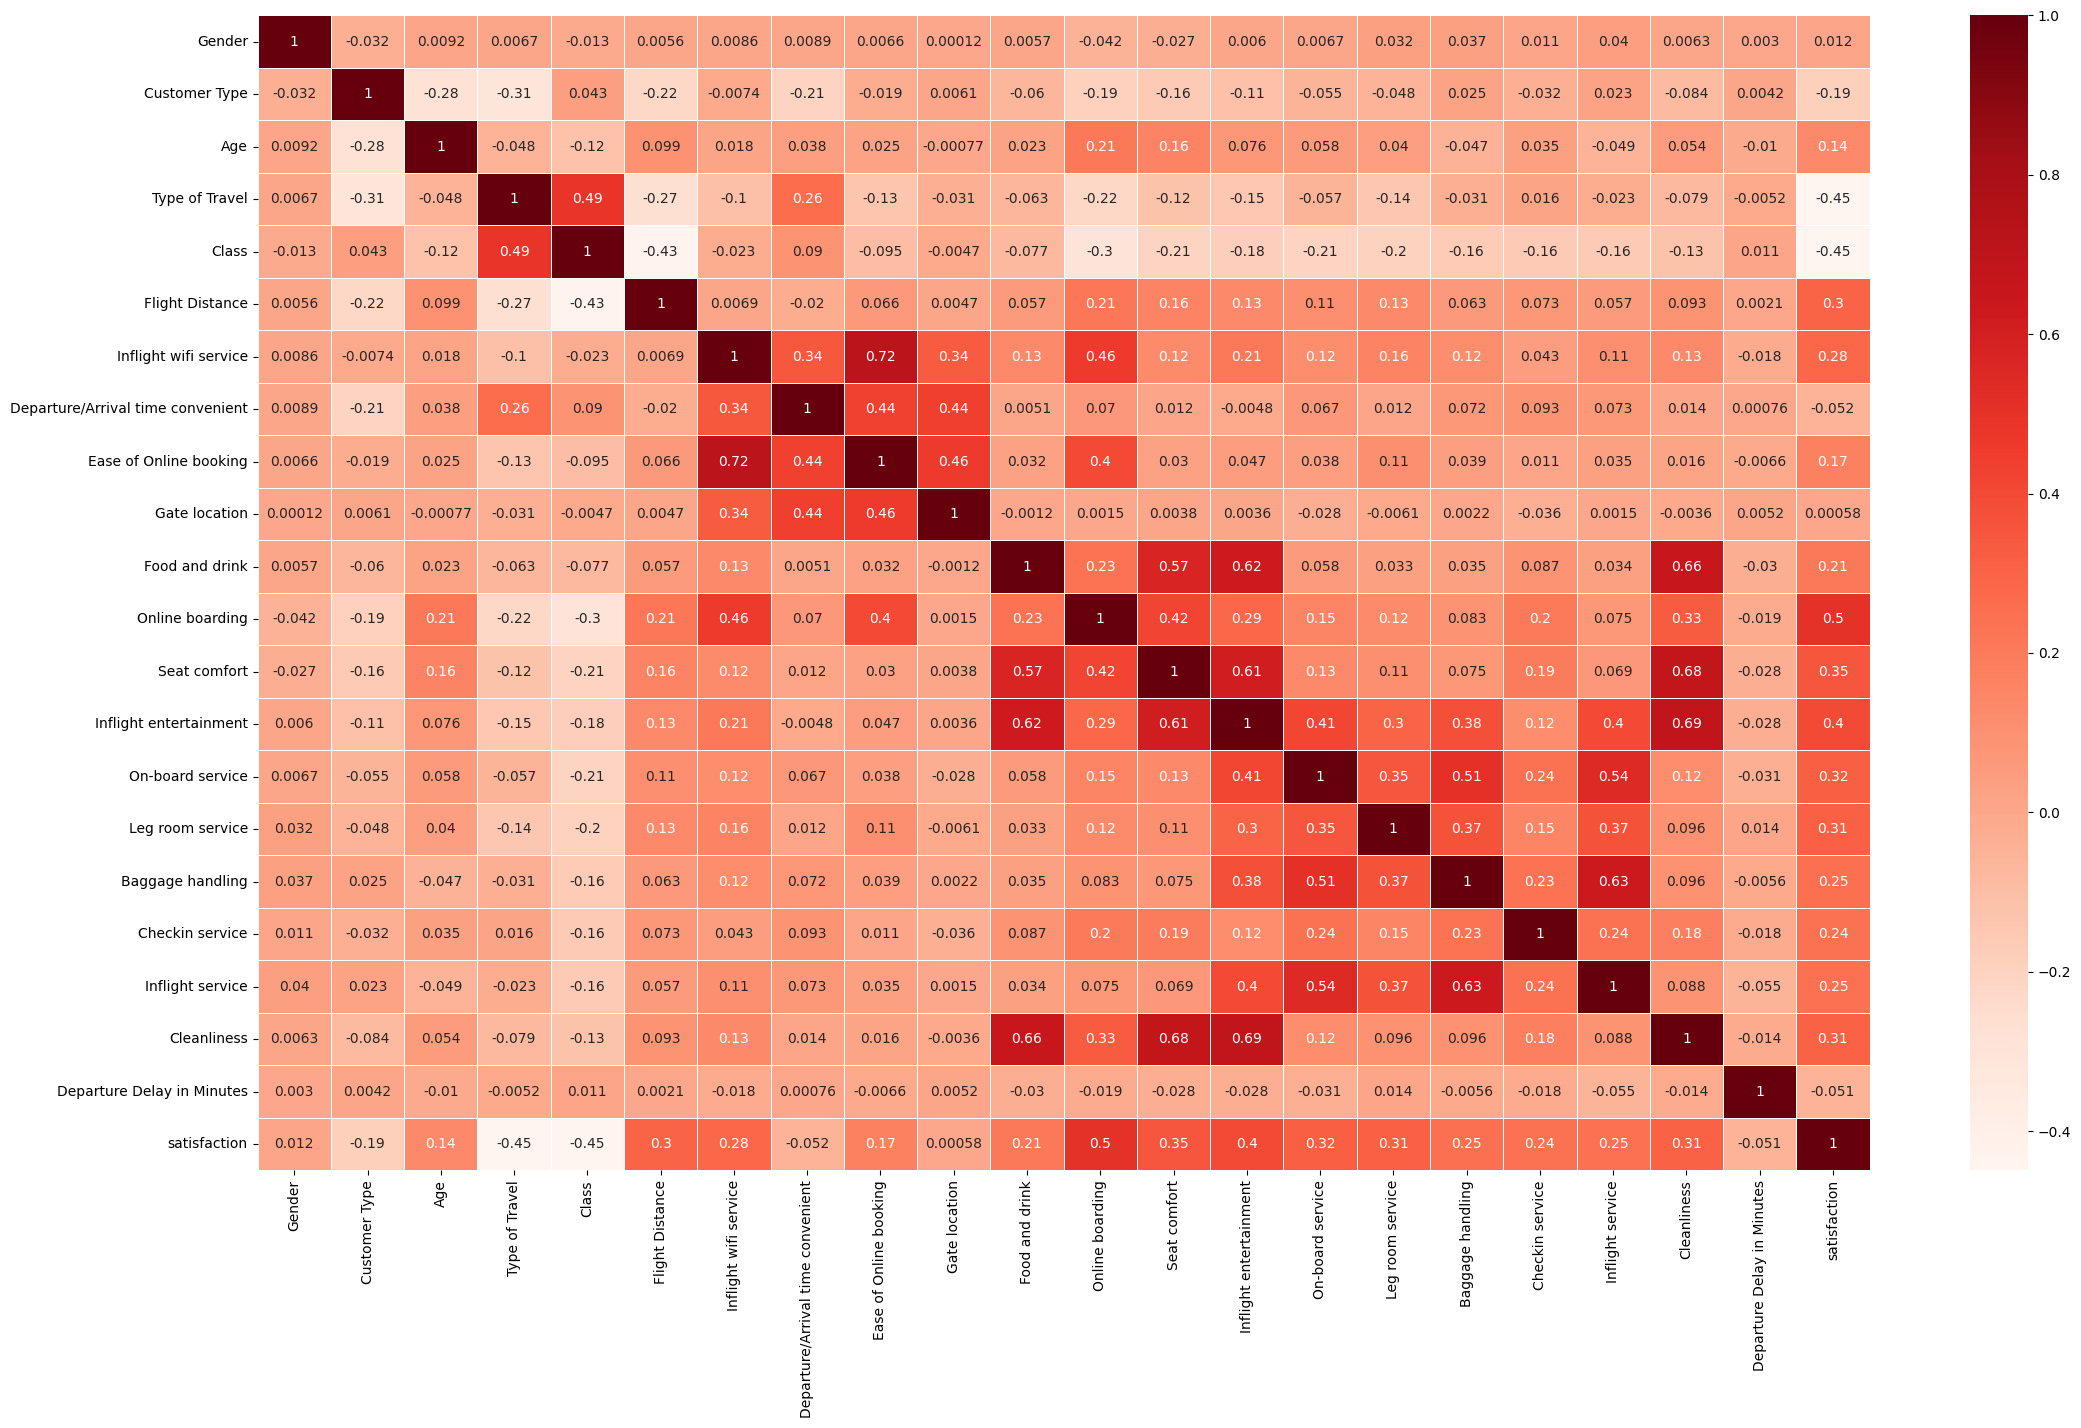

In [ ]:
plt.figure(figsize=(26,15))
cor = train_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=0.5)
plt.show()

Možemo primjetiti da kolone 'Arrival Delay in Minutes' i 'Departure Delay in Minutes' imaju veliku korelaciju, tako da jednu od njih možemo ukloniti iz dataseta. Postoji i logično objašnjenje zašto su ove dvije kolone u korelaciji, ukoliko neki avion kasni sa slijetanjem, on će kasniti i sa sljedećim uzlijetanjem.
Također, neke kolone imaju jako malu korelaciju sa 'satisfaction', ali nećemo ih brisati.

In [ ]:
train_data = train_data.drop(train_data[['Arrival Delay in Minutes']], axis=1)
test_data = test_data.drop(test_data[['Arrival Delay in Minutes']], axis=1)
train_data.corr()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
Gender,1.000000,-0.031583,0.009166,0.006677,-0.012954,0.005611,0.008641,0.008857,0.006645,0.000122,...,-0.026627,0.005989,0.006703,0.031968,0.037374,0.010630,0.039644,0.006330,0.002974,0.012192
Customer Type,-0.031583,1.000000,-0.280423,-0.308314,0.042600,-0.224937,-0.007413,-0.206799,-0.019494,0.006146,...,-0.159814,-0.110214,-0.054621,-0.047890,0.024730,-0.032135,0.022622,-0.083978,0.004243,-0.187747
Age,0.009166,-0.280423,1.000000,-0.048096,-0.116653,0.098546,0.017961,0.038420,0.025123,-0.000775,...,0.159251,0.076151,0.057523,0.040048,-0.047039,0.035477,-0.048801,0.053633,-0.010384,0.136329
Type of Travel,0.006677,-0.308314,-0.048096,1.000000,0.486774,-0.267139,-0.104897,0.259828,-0.133719,-0.030922,...,-0.124401,-0.148361,-0.056916,-0.138582,-0.031294,0.016414,-0.022675,-0.079319,-0.005223,-0.448975
Class,-0.012954,0.042600,-0.116653,0.486774,1.000000,-0.426838,-0.023109,0.090038,-0.094536,-0.004668,...,-0.210158,-0.179192,-0.205083,-0.197321,-0.163983,-0.157415,-0.158671,-0.126304,0.010549,-0.449467
Flight Distance,0.005611,-0.224937,0.098546,-0.267139,-0.426838,1.000000,0.006950,-0.020020,0.065625,0.004720,...,0.157098,0.128488,0.107242,0.133696,0.062903,0.073021,0.057125,0.092815,0.002144,0.298697
Inflight wifi service,0.008641,-0.007413,0.017961,-0.104897,-0.023109,0.006950,1.000000,0.343372,0.715275,0.335938,...,0.122614,0.209262,0.120061,0.160262,0.121072,0.043318,0.110614,0.132795,-0.017781,0.284015
Departure/Arrival time convenient,0.008857,-0.206799,0.038420,0.259828,0.090038,-0.020020,0.343372,1.000000,0.436776,0.444590,...,0.011556,-0.004773,0.066738,0.012338,0.072055,0.093167,0.073403,0.014495,0.000759,-0.051600
Ease of Online booking,0.006645,-0.019494,0.025123,-0.133719,-0.094536,0.065625,0.715275,0.436776,1.000000,0.458633,...,0.029907,0.047037,0.038275,0.107640,0.038919,0.011249,0.035470,0.016148,-0.006632,0.171607
Gate location,0.000122,0.006146,-0.000775,-0.030922,-0.004668,0.004720,0.335938,0.444590,0.458633,1.000000,...,0.003849,0.003581,-0.028374,-0.006055,0.002243,-0.035557,0.001472,-0.003622,0.005191,0.000581


##Anomalije

In [ ]:
factor = 3
train_indices = []
test_indices = []

def anomalies(data, column):
  upper_bound = data[column].mean() + data[column].std() * factor
  lower_bound = data[column].mean() - data[column].std() * factor
  index = data.index[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return index

for col in list(train_data.columns):
  train_indices.extend(anomalies(train_data, col))
for col in list(test_data.columns):
  test_indices.extend(anomalies(test_data, col))

train_data = train_data.drop(train_indices)
test_data = test_data.drop(test_indices)

Pomoću poznate formule određujem da li se u datasetu nalazi anomalija, te ih sve zajedno uklanjam.

##Skaliranje podataka

In [ ]:
from sklearn.preprocessing import StandardScaler

x_train=train_data.drop(['satisfaction'],axis=1)
y_train=train_data['satisfaction']

x_test=test_data.drop(['satisfaction'],axis=1)
y_test=test_data['satisfaction']

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Pomoću Standard Scalera izvršeno je skaliranje podataka zbog toga što neki algoritmi to zahtijevaju, a ni na ostale neće uticati negativno.

#Algoritmi za učenje

##XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

XGB=XGBClassifier()
XGB.fit(x_train,y_train)

XGB_test_score =  XGB.score(x_test, y_test)

print("XGB Classifier training score :",XGB.score(x_train,y_train))
print("XGB Classifier testing score :",XGB_test_score)

XGB Classifier training score : 0.9751678251054476
XGB Classifier testing score : 0.9644115394434516


XGBoost se jako dobro pokazao na ovom datasetu.

##Logistička regresija

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(x_train,y_train)

LR_test_score = LR.score(x_test,y_test)

print("Logistic regression training score :",LR.score(x_train,y_train))
print("Logistic regression testing score :",LR_test_score)

Logistic regression training score : 0.8753440662191331
Logistic regression testing score : 0.8709726831758999


Logistička regresija nema baš najbolje rezultate.

##Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

GBC.fit(x_train,y_train)

GBC_test_score = GBC.score(x_test,y_test)

print("Gradient Boosting Classifier training score :",GBC.score(x_train,y_train))
print("Gradient Boosting Classifier testing score :",GBC_test_score)

Gradient Boosting Classifier training score : 0.9423552941642409
Gradient Boosting Classifier testing score : 0.9428133775848864


GBC ima super rezultate, ali malo lošije od XGBoost kao što je i očekivano.

##KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

KNN_test_score = KNN.score(x_test,y_test)

print("KNN training score :",KNN.score(x_train,y_train))
print("KNN testing score :",KNN_test_score)

KNN training score : 0.948761361611121
KNN testing score : 0.927291294357927


KNN ima pristojne rezulate, ali veoma loše vrijeme izvršavanja.

##Support Vector Classifier SVC

In [ ]:
from sklearn.svm import SVC

svm=SVC()

svm.fit(x_train,y_train)

SVC_test_score = svm.score(x_test,y_test)

print("SVC training score :",svm.score(x_train,y_train))
print("SVC testing score :",SVC_test_score)

SVC training score : 0.9591675082674904
SVC testing score : 0.9552718917538933


SVC također sa veoma lošim vremenom izvršavanja, ali sa super rezultatima.

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

rfc.fit(x_train,y_train)

RFC_test_score = rfc.score(x_test,y_test)

print("RFC training score :",rfc.score(x_train,y_train))
print("RFC testing score :", RFC_test_score)

RFC training score : 0.9999702964415137
RFC testing score : 0.9627265764615778


Random Forest sa veoma jakim rezultatima, ipak malo lošije od XGBC.

##CatBoost Classifier

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

CBC=CatBoostClassifier()

CBC.fit(x_train,y_train)

CBC_test_score = CBC.score(x_test,y_test)

print("CBC Classifier training score :", CBC.score(x_train,y_train))
print("CBC Classifier testing score :", CBC_test_score)

Learning rate set to 0.073922
0:	learn: 0.5926394	total: 25.8ms	remaining: 25.8s
1:	learn: 0.5155608	total: 47.5ms	remaining: 23.7s
2:	learn: 0.4376814	total: 69.5ms	remaining: 23.1s
3:	learn: 0.3841261	total: 93.8ms	remaining: 23.4s
4:	learn: 0.3532342	total: 116ms	remaining: 23s
5:	learn: 0.3237214	total: 141ms	remaining: 23.4s
6:	learn: 0.3015696	total: 163ms	remaining: 23.1s
7:	learn: 0.2750851	total: 187ms	remaining: 23.1s
8:	learn: 0.2604820	total: 218ms	remaining: 24s
9:	learn: 0.2457196	total: 242ms	remaining: 24s
10:	learn: 0.2347327	total: 265ms	remaining: 23.8s
11:	learn: 0.2265527	total: 288ms	remaining: 23.7s
12:	learn: 0.2136169	total: 310ms	remaining: 23.6s
13:	learn: 0.2071254	total: 340ms	remaining: 23.9s
14:	learn: 0.1978313	total: 362ms	remaining: 23.8s
15:	learn: 0.1924853	total: 383ms	remaining: 23.6s
16:	learn: 0.1848197	total: 405ms	remaining: 23.4s
17:	learn: 0.1796154	total: 430ms	remaining: 23.5s
18:	learn: 0.1765539	total: 451ms	remaining: 23.3s
19:	learn: 0.

Za kraj, CatBoost sa veoma dobrim rezultatima, boljim od Random Forest, ali ipak malo lošije od XGBC.

In [ ]:
models = pd.DataFrame({
    'Model': ['XGB Classifier', 'Logistic regression', 'Gradient Boosting Classifier',
              'SVC','CatBoostClassifier','KNN','Random Forest Classifier'
              ],
    'Score': [XGB_test_score,  LR_test_score, GBC_test_score ,
              SVC_test_score, CBC_test_score, KNN_test_score, RFC_test_score
              ]})

models.sort_values(by='Score', ascending=False).style.background_gradient(cmap='Reds')

,Model,Score
0,XGB Classifier,0.964412
4,CatBoostClassifier,0.964258
6,Random Forest Classifier,0.962727
3,SVC,0.955272
2,Gradient Boosting Classifier,0.942813
5,KNN,0.927291
1,Logistic regression,0.870973


Kao najbolji algoritam pokazao se Extreme Gradient Boosting Classifier (XGBC).

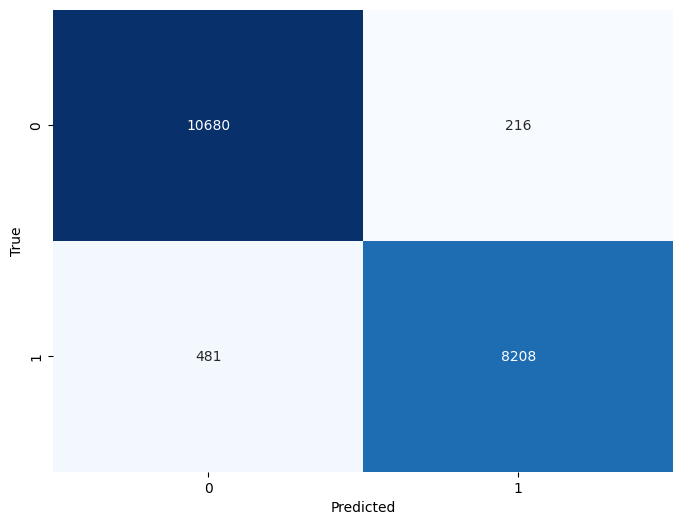

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = XGB.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Pogledajmo za kraj gdje je griješio XGBC, imao je 481 lažno negativnih, te 216 lažno pozitivnih predviđanja. Dakle, za 481 putnika rekao je da nije zadovoljan iako jest, a za 216 da jest zadovoljan iako nije.

In [ ]:
def evaluate_model(path: str) -> float:
    # Učitajte testni skup kao pandas DataFrame
    test_data2 = pd.read_csv(path)
    test_data2 = test_data2.drop(test_data2[['Unnamed: 0.1']], axis=1)
    test_data2 = test_data2.drop(test_data2[['Unnamed: 0']], axis=1)
    test_data2 = test_data2.drop(test_data2[['id']], axis=1)

    objects = ['Flight Distance', 'Inflight wifi service', 'On-board service']
    for object in objects:
        test_data2[object]=test_data2[object].astype(float)

    test_data2 = test_data2.drop(test_data2[['Arrival Delay in Minutes']], axis=1)

    categories=['Gender','Customer Type','Type of Travel','Class','satisfaction']

    L_encoder=LabelEncoder()

    for category in categories:
        test_data2[category]=L_encoder.fit_transform(test_data2[category])

    factor = 3
    test2_indices = []

    for col in list(test_data2.columns):
      test2_indices.extend(anomalies(test_data2, col))

    test_data2 = test_data2.drop(test_indices)

    x_test2=test_data2.drop(['satisfaction'],axis=1)
    y_test2=test_data2['satisfaction']

    x_test2 = scaler.fit_transform(x_test2)

    XGB_test_score = XGB.score(x_test2, y_test2)
    KNN_test_score = KNN.score(x_test2, y_test2)
    LR_test_score = KNN.score(x_test2, y_test2)
    CBC_test_score = KNN.score(x_test2, y_test2)
    GBC_test_score = KNN.score(x_test2, y_test2)
    RFC_test_score = KNN.score(x_test2, y_test2)
    SVC_test_score = KNN.score(x_test2, y_test2)

    return max(SVC_test_score, RFC_test_score, GBC_test_score, CBC_test_score, LR_test_score, KNN_test_score, XGB_test_score)

In [ ]:
evaluate_model('test.csv')

0.9644115394434516